In [322]:
class Card():
    def __init__(self, face, suit):
        self.suit = suit
        self.face = face
        if isinstance(self.face, str):
            if face == "Jack":
                self.value = 11
            elif face == "Queen":
                self.value = 12
            elif face  == "King":
                self.value = 13
            else:
                self.value = 14
        else:
            self.value = int(self.face)
    def face(self):
        #"""Return the Card's self._face value."""
        return(self._face)
    def suit(self):
        #"""Return the Card's self._suit value."""
        return self._suit
    def value(self):
        return self.value
    def image_name(self):
        #"""Return the Card's image file name."""
        return str(self).replace(' ', '_') + '.png'
    def _repr_(self):
        #"""Return string representation for repr()."""
        return f"Card(face='{self.face}', suit='{self.suit}')"
    def _str_(self):
        #"""Return string representation for str()."""
        return f'{self.face} of {self.suit}'
    def _format_(self, formation):
        #"""Return formatted string representation for str()."""
        return f'{str(self):{formation}}'

In [323]:
import random
class Deck():
     # constant number of Cards
    NUMBER_OF_CARDS = 52
    def __init__(self):
        #"""Initialize the deck."""
        self._current_card = 0
        self._deck = []
        for i in range(4):
            suit = ""
            if i == 0:
                suit = "Spades"
            elif i == 1:
                suit = "Clubs"
            elif i == 2:
                suit = "Hearts"
            else:
                suit = "Diamonds"
            for x in range(13):
                if x == 0:
                    self._deck.append(Card(2, suit))
                elif x == 1:
                    self._deck.append(Card(3, suit))
                elif x == 2:
                    self._deck.append(Card(4, suit))
                elif x == 3:
                    self._deck.append(Card(5, suit))
                elif x == 4:
                    self._deck.append(Card(6, suit))
                elif x == 5:
                    self._deck.append(Card(7, suit))
                elif x == 6:
                    self._deck.append(Card(8, suit))
                elif x == 7:
                    self._deck.append(Card(9, suit))
                elif x == 8:
                    self._deck.append(Card(10, suit))
                elif x == 9:
                    self._deck.append(Card("Jack", suit))
                elif x == 10:
                    self._deck.append(Card("Queen", suit))
                elif x == 11:
                    self._deck.append(Card("King", suit))
                elif x == 12:
                    self._deck.append(Card("Ace", suit))
                    
                
            
    def shuffle(self):
        #"""Shuffle deck."""
        self._current_card = 0
        random.shuffle(self._deck)
    def deal_card(self):
        #"""Return one Card."""
        try:
            card = self._deck[self._current_card]
            self._current_card += 1
            return card
        except:
            return None
    def __str__(self):
        #"""Return a string representation of the current _deck."""
        s = ''

        for index, card in enumerate(self._deck):
            s += f'{self._deck[index]:<19}'
            if (index + 1) % 4 == 0:
                s += '\n'

        return s

In [324]:
class Hand():
    numberOfCards = 0
    HANDS = ['High Card', 'Pair', 'Two Pair', 'Three of a Kind', 'Straight', 'Flush', 'Full House', 'Four of a Kind', 'Straight Flush']
   
    def _init_(self):
        self.hand = []
        
    def deal_hand(self, deck):
        for x in range(5):
            self.hand.append(deck.deal_card())
        numbeOfCards = 5
    
    def get_faces(self):
        faces = []
        for x in self.hand:
            faces[x.face]
        return faces
    def get_suits(self):
        suits = []
        for x in self.hand:
            suits[x.suit]
        return suits
    def sort_hand(self):
        sorted(self.hand, key=lambda value: self.hand.index(value), reverse=True)
    
    def _straight_flush(self):
        #if the hand is both a straight and a flush it must be a stright flush
        if self._is_straight() and self._is_flush():
            return True
        else:
            return False
    
    def _four_of_a_kind(self):
        #finds the card value that is in the hand the most
        faces = []
        for i in self.hand:
            faces.append(i.face)
        a = max(set(faces), key = faces.count)
        count = 0
        #counts the number of occurences of cards with that value in that hand
        for i in faces:
            if i == a:
                count = count + 1
        #if that count is four then it is a four of a kind
        if count == 4:
            return True
        else:
            return False
        
        
    
    def _full_house(self):
        #checks if the hand contains a three of a kind which is a prerequisite to a full house
        if self._three_of_a_kind():
            #creates a temporary hand and removes the three of a kind from that hand
            temp = []
            for i in self.hand:
                temp.append(i)
            #finds the card value that is in the hand the most
            values = []
            for i in temp:
                values.append(i.value)
            a = max(set(values), key = values.count)
            #removes those cards from the temporary hand
            position = 0
            for i in temp:
                if i.value == a:
                    temp.pop(position)
                else:
                    position = position+1
            #if the two cards remaining have the same face then the hand is a full house
            if temp[0].face == temp[1].face:
                return True
            else:
                return False
        else:
            return False
    
    def _is_flush(self):
        #takes the suit of the first card in the hand
        a = self.hand[0].suit
        b = True
        #checks if the rest of the cards in the hand matches the suit of the first and returns true if they do
        for x in self.hand:
            if x.suit != a:
                b = False
        return b
    
    def _is_straight(self):
        val = 14
        position = 0
        track = 0
        check = False
        #finds the value of the card in the hand that has the lowest value
        for i in self.hand:
            if i.value < val:
                position = track
                val = i.value
            track = track + 1
        #checks if there is a card in the hand with a value one above the lowest card
        a = False
        for i in self.hand:
            if i.value == val+1:
                a = True
        #checks if there is a card in the hand with a value two above the lowest card
        b = False
        for i in self.hand:
            if i.value == val+2:
                b = True
        #checks if there is a card in the hand with a value three above the lowest card
        c = False
        for i in self.hand:
            if i.value == val + 3:
                c = True
        #checks if there is a card in the hand with a value four above the lowest card
        d = False
        for i in self.hand:
            if i.value == val + 4:
                d = True
        #ACE SPECIAL CASE
        #if there is an ace and a, b, and c are correct, then check if the low card is two and set d to true
        if a and b and c and val == 2 and self.hand[0].value == 14:
            d = True
        #if all four are true return true
        if a and b and c and d:
            check = True
        return check
    
    def _three_of_a_kind(self):
        #finds the card value that is in the hand the most
        values = []
        for i in self.hand:
            values.append(i.value)
        a = max(set(values), key = values.count)
        count = 0
        #counts the number of occurences of that card value
        for i in self.hand:
            if i.value == a:
                count = count + 1
        #if the card value occurs 3 times the hand is a 3 of a kind
        if count == 3:
            return True
        else:
            return False
    
    def _is_two_pair(self):
        #checks if a pair occurs in the hand
        if self._is_pair():
            #copies the hand to a temporary hand 
            temp = []
            for i in self.hand:
                temp.append(i)
            #finds the card value that is in the hand the most
            values = []
            for i in temp:
                values.append(i.value)
            a = max(set(values), key = values.count)
            #removes the pair from that hand
            position = 0
            for i in temp:
                if i.value == a:
                    temp.pop(position)
                else:
                    position = position+1
            #returns true if there is a pair remaining in this temporary hand
            if temp[1].value ==  temp[2].value or temp[0].value == temp[2].value or temp[0].value == temp[1].value:
                return True
            else:
                return False
        else:
            return False
    
    def _is_pair(self):
        #finds the card value that is in the hand the most
        values = []
        for i in self.hand:
            values.append(i.value)
        a = max(set(values), key = values.count)
        count = 0
        #counts the number of occurences of cards with that value in that hand
        for i in self.hand:
            if i.value == a:
                count = count + 1
        #if that count is 2 then it's a pair
        if count == 2:
            return True
        else:
            return False
        
    def _evaluate_hand(self):
        if self._straight_flush():
            return "Straight Flush"
        elif self._four_of_a_kind():
            return "Four of a Kind"
        elif self._is_flush():
            return "Flush"
        elif self._full_house():
            return "Full House"
        elif self._is_straight():
            return "Straight"
        elif self._three_of_a_kind():
            return "Three of a Kind"
        elif self._is_two_pair():
            return "Two Pair"
        elif self._is_pair():
            return "Pair"
        else:
            return "High Card"
    
    def _str_(self):
        faces = self.get_faces()
        suits = self.get_suits()
        for i in range(5):
            print(faces[i] + " of " + suits[i])
        print("Your hand is a "+self._evaluate_hand())

In [325]:
from matplotlib import animation
from collections import Counter
import matplotlib.pyplot as plt
import random
import seaborn as sns
import sys
from IPython.display import HTML

occurences = []
def update(passes):
    #def update():
    
    for i in range(passes):
        myDeck = Deck()
        myDeck.__init__()
        myDeck.shuffle()
        hands = []
        for i in range(10):
            hold = Hand()
            hold._init_()
            hold.deal_hand(myDeck)
            hold.sort_hand()
            hands.append(hold._evaluate_hand())
            occurences.append(hands[i])
    
    counter = Counter(occurences)
    sumOfOccurences = [counter['High Card'], counter['Pair'], counter['Two Pair'], counter['Three of a Kind'], counter['Straight'], counter['Flush'], 
                      counter['Full House'], counter['Four of a Kind'], counter['Straight Flush']]
    HANDS = ['High Card', 'Pair', 'Two Pair', 'Three of a Kind', 'Straight', 'Flush', 'Full House', 'Four of a Kind', 'Straight Flush']
    plt.cla()
    axes = sns.barplot(HANDS, sumOfOccurences, palette='bright') # new bars
    axes.set_title(f'Poker Hand Frequencies for {sum(sumOfOccurences):,} Hands')
    axes.set(xlabel='Hand Type', ylabel='Frequency')
    plt.xticks(rotation=45)
    axes.set_ylim(top=max(sumOfOccurences) * 1.20)
    for bar, frequency in zip(axes.patches, sumOfOccurences):
        text_x = bar.get_x() + bar.get_width() / 2.0  
        text_y = bar.get_height() 
        text = f'{frequency:,}\n{frequency / sum(sumOfOccurences):.3%}'
        axes.text(text_x, text_y, text, ha='center', va='bottom')
    
    
    number_of_frames = sys.argv[1]
    sns.set_style('whitegrid')  # white backround with gray grid lines
    figure = plt.figure('Poker Hand Outcomes')  # Figure for animation
    #configure and start animation that calls function update
    card_animation = animation.FuncAnimation(figure, update, repeat=False, frames=number_of_frames, interval=33, fargs=(6000))
    
    plt.show()
    
    #Threw an error when trying to run it. I think it was from the number of frames not being red from the 
    #command window on execution, which I'm not sure how to do. 
    #HTML(card_animation.to_jshtml())


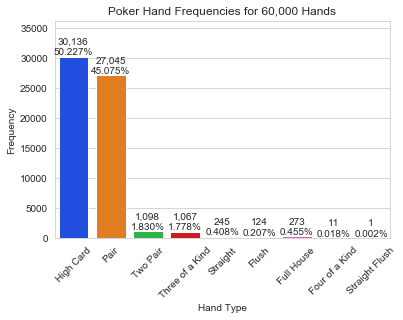

<Figure size 432x288 with 0 Axes>

In [326]:
update(6000)

In [327]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#fig, ax = plt.subplots()
#fig.patch.set_visible(False)
#ax.axis('off')
#ax.axis('tight')
counter = Counter(occurences)
hold = [counter['High Card'], counter['Pair'], counter['Two Pair'], counter['Three of a Kind'], counter['Straight'], counter['Flush'], 
                      counter['Full House'], counter['Four of a Kind'], counter['Straight Flush']]
df = pd.DataFrame([[sum(hold), counter['High Card'], counter['Pair'], counter['Two Pair'], counter['Three of a Kind'],
                    counter['Straight'], counter['Flush'], counter['Full House'], counter['Four of a Kind'], counter['Straight Flush']], 
                   [1, counter['High Card']/sum(hold), counter['Pair']/sum(hold), counter['Two Pair']/sum(hold), counter['Three of a Kind']/sum(hold),
                   counter['Straight']/sum(hold), counter['Flush']/sum(hold), counter['Full House']/sum(hold), counter['Four of a Kind']/sum(hold), counter['Straight Flush']/sum(hold)]], 
                  columns = ['Total hands', 'High Card', 'Pair', 'Two Pair', 'Three of a Kind', 'Straight', 'Flush', 'Full House', 'Four of a Kind', 'Straight Flush'])
df.index = ['Total occrences', 'Freqency %']
df

,Total hands,High Card,Pair,Two Pair,Three of a Kind,Straight,Flush,Full House,Four of a Kind,Straight Flush
Total occrences,60000,30136.000000,27045.00000,1098.0000,1067.000000,245.000000,124.000000,273.00000,11.000000,1.000000
Freqency %,1,0.502267,0.45075,0.0183,0.017783,0.004083,0.002067,0.00455,0.000183,0.000017


In [328]:
#What i've done in this project is create an example of the law of large numbers by simulating poker hands.
#The law of large numbers is a statistical term for the outcome of an experiment that is completed a large number of times.
#This states that the average result of many outcomes of an experiment will be close to the expected value
#and will get closer as the experiment is completed more times. When compared to the known frequencies of 
#poker hands obtained by previous experimentations, we can see that the graphs and tables generated by my program
#support the law of large numbers. When using 60000 hands to evaluate the frequency of each hand, we can see that my graph
#is slightly skewed in certain areas but the graph always follows the curve provided by the law of large numbers.
#The frequencies on the table are also slightly skewed compared to the known average, but we can also see that
#the frequencies obtained by the program are not off by large amounts and on none of the skews are enough to be 
#considered outliers when compared to the probability formula for poker hands.